In [88]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
from util import *
import glob 
import IPython.display
import scipy
import scipy.misc

In [3]:
def load_folder_list(path=""):
    """Return a folder list in a folder by given a folder path.

    Parameters
    ----------
    path : a string or None
        A folder path.
    """
    return [os.path.join(path,o) for o in os.listdir(path) if os.path.isdir(os.path.join(path,o))]

In [4]:
cwd = os.getcwd()
data_dir = os.path.join(cwd,'ESC-50/')

category_sub_dir = load_folder_list(data_dir)

In [5]:
cat_key = {}
for i, sub_dir in enumerate(category_sub_dir):
    cat_key[sub_dir.split('/')[-1]] = i

In [6]:
cat_key

{'101 - Dog': 33,
 '102 - Rooster': 5,
 '103 - Pig': 49,
 '104 - Cow': 25,
 '105 - Frog': 4,
 '106 - Cat': 7,
 '107 - Hen': 2,
 '108 - Insects': 45,
 '109 - Sheep': 18,
 '110 - Crow': 8,
 '201 - Rain': 23,
 '202 - Sea waves': 15,
 '203 - Crackling fire': 14,
 '204 - Crickets': 44,
 '205 - Chirping birds': 39,
 '206 - Water drops': 29,
 '210 - Thunderstorm': 9,
 '301 - Crying baby': 37,
 '302 - Sneezing': 22,
 '303 - Clapping': 40,
 '304 - Breathing': 43,
 '305 - Coughing': 47,
 '306 - Footsteps': 41,
 '307 - Laughing': 31,
 '308 - Brushing teeth': 13,
 '309 - Snoring': 3,
 '310 - Drinking - sipping': 38,
 '401 - Door knock': 17,
 '402 - Mouse click': 21,
 '403 - Keyboard typing': 24,
 '404 - Door - wood creaks': 34,
 '405 - Can opening': 16,
 '406 - Washing machine': 27,
 '407 - Vacuum cleaner': 46,
 '408 - Clock alarm': 30,
 '409 - Clock tick': 48,
 '410 - Glass breaking': 42,
 '501 - Helicopter': 1,
 '502 - Chainsaw': 0,
 '503 - Siren': 32,
 '504 - Car horn': 20,
 '505 - Engine': 28,

In [7]:
audios = np.load("esc_44_sound.py")

In [45]:
images = np.load("esc_44_image.npy")

In [16]:
dogs=glob.glob('/home/harshipr/Desktop/Fall2017/DL599/Projects/PreSound/ESC-50/101 - Dog/Audio/*')

In [47]:
images[19,-11,:,:,:].shape

(64, 64, 3)

In [ ]:
'/home/harshipr/Desktop/Fall2017/DL599/Projects/PreSound/ESC-50/101 - Dog/Audio/4-207124-A.ogg'

In [81]:
audios_f = audios[0].reshape(40,220500)

In [91]:
clips = audios_f/44100

In [94]:
def merge(images, size):
    h, w = images.shape[1], images.shape[2]
    img = np.zeros((h * size[0], w * size[1], 3))
    for idx, image in enumerate(images):
        i = idx % size[1]
        j = idx // size[1]
        img[j*h:j*h+h, i*w:i*w+w, :] = image
    return img

In [95]:
clips.shape

(40, 220500)

In [93]:
scipy.misc.imsave('merge.png', merge(clips, [8,5]))

IndexError: tuple index out of range

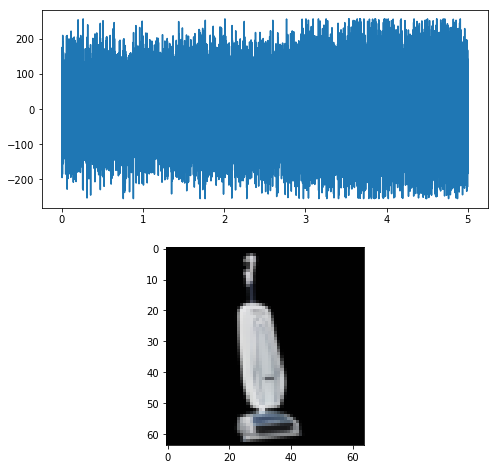

In [83]:
cat = 40
idx = 15
fig = plt.figure(figsize=(8,8))  
clip = audios[cat,idx,:,:,:].reshape(-1)
ax1 = plt.subplot(2, 1, 1)
ax1.plot(np.arange(0, 220500) / 44100.0, clip)
fig.savefig('pet.png')
ax2 = plt.subplot(2, 1, 2)
ax2.imshow(images[cat,idx,:,:,:])
plt.show()
librosa.output.write_wav('pet.wav', clip,sr=44100)

In [20]:
for clip in audios[33,-13,:,:,:]:
    clip = clip.reshape(-1)
    print(clip.shape)
    plt.subplot(2, 1, 1)
#     plt.title('{0} : {1}'.format(clip.category, clip.filename))
    plt.plot(np.arange(0, len(clip)) / 44100.0, clip)
    plt.show()
#     print(len(audio.raw))
   
#     plt.subplot(2, 1, 2)
#     librosa.display.specshow(clip.logamplitude, sr=44100, x_axis='frames', y_axis='linear', cmap='RdBu_r')